# Atelier d'ACP

**L'objectif de cet atelier est d'analyser un jeu de données composé de 30 observations et de 8 variables de différentes échelles, en appliquant une ACP normée pour réduire le nombre de dimensions et projeter les données dans un espace de moindre dimension.**

## ACP Normé

### 1. Importation des Bibliothèques

Nous commençons par importer les bibliothèques essentielles pour effectuer une Analyse en Composantes Principales (ACP) avec Python.

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Préparation des Données

Un jeu de données fictif est créé avec 8 dimensions et 30 observations pour simuler une analyse réaliste.

In [19]:
data = pd.DataFrame({
    'Age': [25, 32, 41, 27, 35, 29, 45, 39, 33, 28, 42, 31, 36, 30, 40, 34, 37, 26, 38, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54],
    'Salaire': [35000, 42000, 55000, 38000, 48000, 40000, 60000, 52000, 45000, 39000, 56000, 41000, 49000, 37000, 53000, 46000, 50000, 36000, 51000, 57000, 58000, 59000, 60000, 61000, 62000, 63000, 64000, 65000, 66000, 67000],
    'Expérience': [3, 6, 10, 4, 8, 5, 12, 9, 7, 3, 11, 5, 8, 4, 11, 7, 9, 3, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22],
    'Nombre d Enfants': [1, 2, 0, 1, 2, 1, 0, 2, 1, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0],
    'Surface Logement': [65, 80, 95, 70, 85, 75, 100, 90, 80, 68, 92, 72, 85, 67, 95, 78, 88, 64, 90, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107],
    'Revenu Annuel': [45000, 55000, 70000, 48000, 60000, 50000, 75000, 65000, 57000, 46000, 72000, 52000, 62000, 44000, 68000, 58000, 63000, 43000, 64000, 73000, 74000, 75000, 76000, 77000, 78000, 79000, 80000, 81000, 82000, 83000],
    'Taille': [170, 175, 180, 165, 172, 168, 182, 178, 173, 166, 181, 167, 174, 164, 180, 171, 176, 163, 177, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193],
    'Poids': [70, 75, 82, 65, 73, 68, 85, 80, 74, 64, 84, 66, 72, 62, 83, 67, 78, 60, 79, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]
})
data

,Age,Salaire,Expérience,Nombre d Enfants,Surface Logement,Revenu Annuel,Taille,Poids
0,25,35000,3,1,65,45000,170,70
1,32,42000,6,2,80,55000,175,75
2,41,55000,10,0,95,70000,180,82
3,27,38000,4,1,70,48000,165,65
4,35,48000,8,2,85,60000,172,73
5,29,40000,5,1,75,50000,168,68
6,45,60000,12,0,100,75000,182,85
7,39,52000,9,2,90,65000,178,80
8,33,45000,7,1,80,57000,173,74
9,28,39000,3,1,68,46000,166,64


* **Données** :

     Age, Salaire, Expérience, Nombre d’Enfants, Surface Logement, Revenu Annuel, Taille, Poids

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               30 non-null     int64
 1   Salaire           30 non-null     int64
 2   Expérience        30 non-null     int64
 3   Nombre d Enfants  30 non-null     int64
 4   Surface Logement  30 non-null     int64
 5   Revenu Annuel     30 non-null     int64
 6   Taille            30 non-null     int64
 7   Poids             30 non-null     int64
dtypes: int64(8)
memory usage: 2.0 KB


### 3. Centrage et Réduction

Les données sont centrées et réduites pour normaliser les échelles, ce qui est crucial pour l'ACP.

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)
X_scaled

array([[-1.67524673, -1.70794373, -1.37290124,  0.        , -1.75703443,
        -1.59895759, -0.9319539 , -0.8909281 ],
       [-0.86650693, -0.9977097 , -0.84031024,  1.29099445, -0.64498732,
        -0.80608606, -0.37278156, -0.42690305],
       [ 0.17330139,  0.32129634, -0.13018891, -1.29099445,  0.46705979,
         0.38322124,  0.18639078,  0.22273202],
       [-1.44417822, -1.40355772, -1.19537091,  0.        , -1.38635206,
        -1.36109613, -1.49112624, -1.35495314],
       [-0.51990416, -0.38893768, -0.48524958,  1.29099445, -0.27430495,
        -0.40965029, -0.70828497, -0.61251307],
       [-1.2131097 , -1.20063371, -1.01784058,  0.        , -1.01566969,
        -1.20252183, -1.15562284, -1.07653812],
       [ 0.63543842,  0.82860636,  0.22487176, -1.29099445,  0.83774216,
         0.77965701,  0.41005972,  0.50114705],
       [-0.05776713,  0.01691033, -0.30771924,  1.29099445,  0.09637742,
        -0.01321453, -0.03727816,  0.037122  ],
       [-0.75097267, -0.69332369

**=>** Les données sont maintenant sur une échelle comparable, permettant une analyse significative.

### 4. Calcul de la Matrice de Corrélation

Une matrice de corrélation est calculée pour identifier les relations entre les variables.

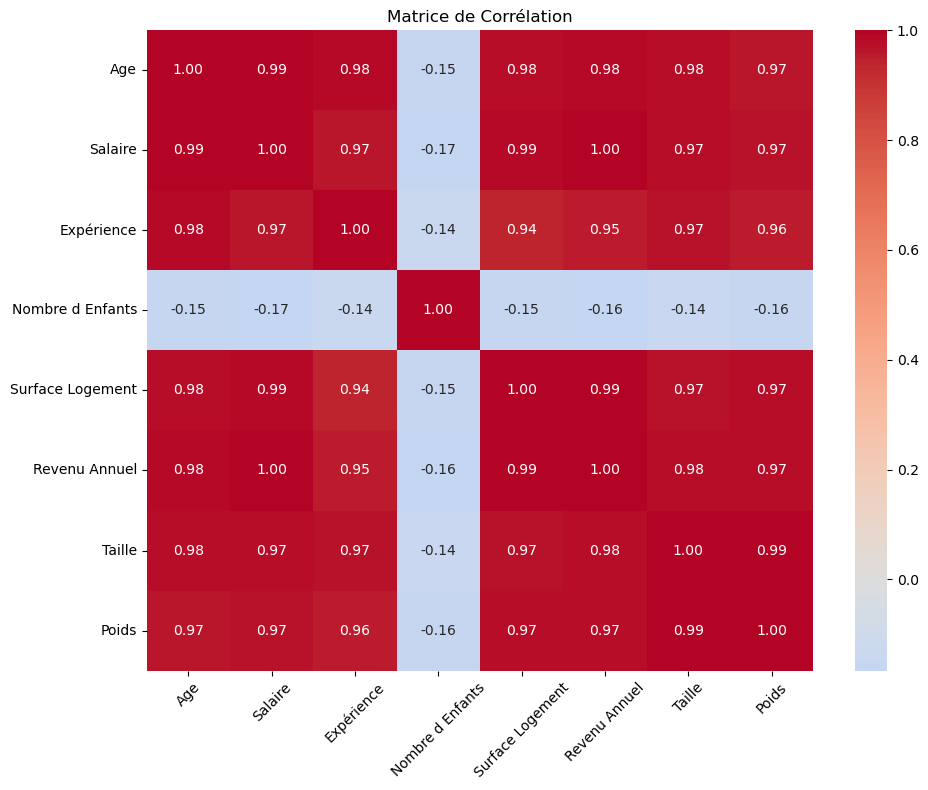

In [22]:
corr_matrix = np.corrcoef(X_scaled.T)
plt.figure(figsize=(10, 8))  # J'ai légèrement agrandi la figure pour une meilleure lisibilité
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap="coolwarm", 
            center=0, 
            fmt=".2f",
            xticklabels=data.columns,  # Ajout des noms des variables sur l'axe x
            yticklabels=data.columns)  # Ajout des noms des variables sur l'axe y
plt.title("Matrice de Corrélation")
plt.xticks(rotation=45)  # Rotation des labels pour une meilleure lisibilité
plt.yticks(rotation=0)
plt.tight_layout()  # Ajustement automatique de la mise en page
plt.show()

#### Groupes de variables fortement corrélées positivement (en rouge foncé, coefficients ≈ 0.97-1.00) :

- **Age, Salaire, Expérience**
- **Surface Logement, Revenu Annuel**
- **Taille, Poids**

Ces corrélations très fortes (>0.95) suggèrent que ces variables évoluent pratiquement ensemble.

---

#### Variable isolée (ligne/colonne bleue) :

Le **"Nombre d'Enfants"** (variable 3) se distingue nettement des autres variables :

- Il présente des corrélations négatives faibles avec toutes les autres variables (coefficients entre -0.14 et -0.17)
- Cela indique que cette variable varie de manière indépendante des autres caractéristiques


### 5. Extraction des Valeurs Propres

Les valeurs propres et vecteurs propres de la matrice de corrélation sont extraits pour déterminer les composantes principales.

In [23]:
eigenvalues, eigenvectors = np.linalg.eig(corr_matrix)
eigenvalues_rounded = np.round(eigenvalues, 2)
eigenvectors_rounded = np.round(eigenvectors, 2)

print("Valeurs propres :", eigenvalues_rounded)
print("Vecteurs propres :\n", eigenvectors_rounded)


Valeurs propres : [6.88 0.97 0.07 0.06 0.01 0.   0.   0.  ]
Vecteurs propres :
 [[ 0.38  0.03 -0.2  -0.36 -0.27  0.71  0.3  -0.15]
 [ 0.38  0.01  0.17 -0.36 -0.28 -0.07 -0.73  0.28]
 [ 0.37  0.04 -0.73 -0.19  0.4  -0.34  0.04  0.12]
 [-0.07  1.    0.02 -0.01 -0.01  0.   -0.    0.01]
 [ 0.38  0.02  0.5  -0.09  0.7   0.11 -0.04 -0.3 ]
 [ 0.38  0.01  0.35 -0.16 -0.31 -0.52  0.57  0.13]
 [ 0.38  0.04 -0.14  0.49 -0.31 -0.17 -0.2  -0.66]
 [ 0.38  0.02  0.04  0.66  0.07  0.27  0.06  0.58]]


**=>** Les valeurs propres indiquent la quantité de variance expliquée par chaque composante. Ici, la première composante explique la majorité de la variance.

- La première valeur propre (**6.88**) est nettement dominante, représentant environ **86%** (6.88/8) de la variance totale.
- La deuxième valeur propre (**0.97**) représente environ **12%** de la variance.
- Les autres valeurs propres sont très faibles (≤ 0.07), représentant ensemble moins de **2%** de la variance.
- Les dernières valeurs propres proches de **0** confirment la forte redondance observée dans la matrice de corrélation.


### 6. Illustration des Composantes Principales

La variance expliquée par chaque composante est visualisée pour choisir le nombre optimal de composantes.

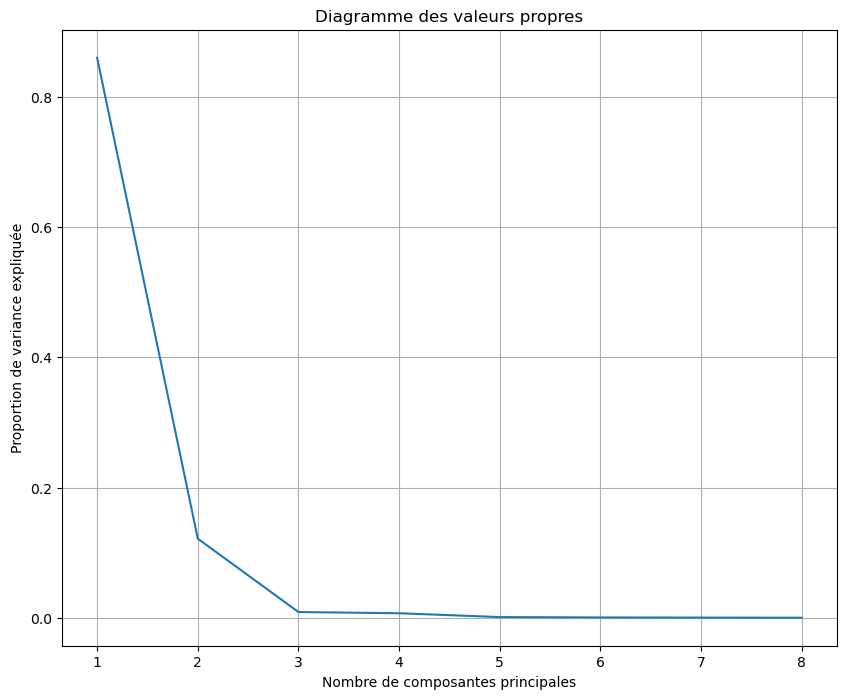

In [24]:
pca = PCA(n_components=len(data.columns))
pca.fit(X_scaled)

plt.figure(figsize=(10, 8))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Proportion de variance expliquée')
plt.title('Diagramme des valeurs propres')
plt.grid()
plt.show()

**Scree Plot**

#### Première composante (CP1) :

- Elle explique environ **85%** de la variance totale (proportion ≈ 0.85).
- C'est de loin la composante la plus importante.
- Cela confirme la forte corrélation entre la majorité des variables observée dans la matrice de corrélation.

---

#### Deuxième composante (CP2) :

- Elle explique environ **12%** de la variance (proportion ≈ 0.12).
- Il y a une rupture très nette ("coude") dans la courbe après cette composante.
- Cette composante correspond principalement à la variable *"Nombre d'Enfants"* qui était indépendante des autres.

---

#### Composantes 3 à 8 :

- Elles expliquent chacune moins de **1%** de la variance.
- La courbe est pratiquement horizontale à partir de la composante 3.
- Ces composantes peuvent être considérées comme du "bruit" statistique.

---

#### Conclusions :

- Le "coude" très marqué après la deuxième composante suggère clairement de ne retenir que **2 composantes principales**.
- Ces 2 composantes expliquent environ **97%** de la variance totale, ce qui est excellent.
- La réduction de dimension de **8 à 2 variables** est donc très pertinente et permettra une visualisation efficace des données sans perte significative d'information.


### 7. Application de l'ACP

#### 1. On réduit les données à deux dimensions principales pour simplifier l'analyse

In [25]:
# Application de l'ACP
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


#### 2. Affichage des nouvelles données projetées sur les composantes principales.

In [26]:
print("Nouvelles données après ACP :")
print(X_pca)

Nouvelles données après ACP :
[[ 3.74772646 -0.24563442]
 [ 1.9576099   1.16565203]
 [-0.70263211 -1.25437017]
 [ 3.63465768 -0.2490061 ]
 [ 1.37000429  1.19410323]
 [ 2.97301864 -0.20189559]
 [-1.68117501 -1.19118752]
 [ 0.18757693  1.27523942]
 [ 1.70302501 -0.11649007]
 [ 3.72719477 -0.25557641]
 [-0.93934604 -1.23730134]
 [ 2.98281466 -0.20656653]
 [ 1.17818538  1.20763645]
 [ 3.89270464 -0.26255242]
 [-0.62299108 -1.25297829]
 [ 1.97540512 -0.13850312]
 [ 0.62214388  1.24746069]
 [ 4.39812685 -0.2982451 ]
 [ 0.13360168 -1.30455286]
 [-1.2344627   1.37270118]
 [-1.69508542 -1.18114325]
 [-1.93370974  0.13037685]
 [-2.12859488  1.43895817]
 [-2.58921759 -1.11488626]
 [-2.78410273  0.19369506]
 [-2.97898787  1.50227638]
 [-3.43961058 -1.05156805]
 [-3.63449572  0.25701327]
 [-3.82938086  1.56559459]
 [-4.29000357 -0.98824984]]


#### 3.Visualisation des données dans l'espace des deux premières composantes principales.

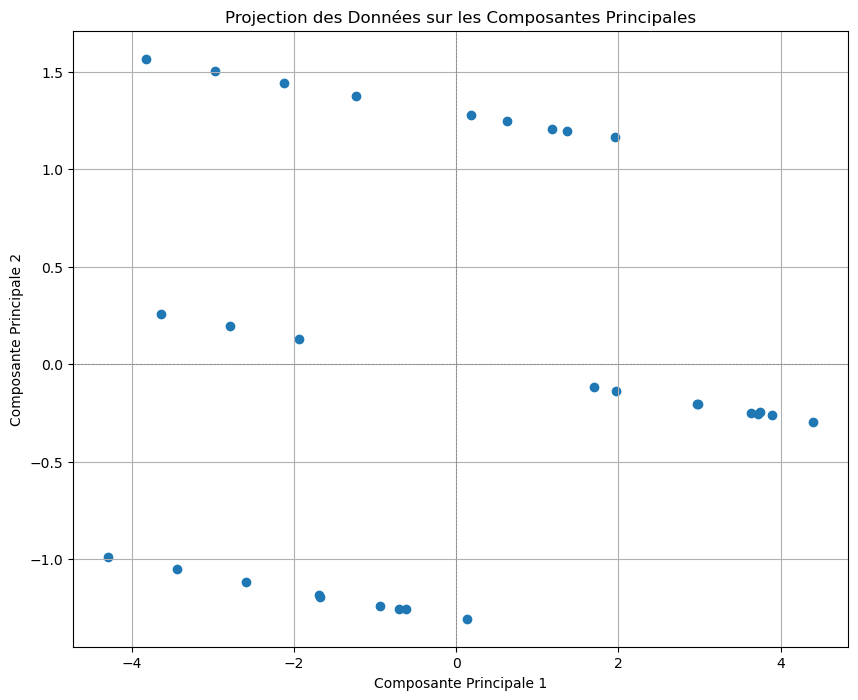

In [27]:
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Projection des Données sur les Composantes Principales')
plt.grid()
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.show()

- On observe une répartition des points en 3 groupes assez distincts sur CP2 :

     * Un groupe en haut (CP2 ≈ +1.5)
     * Un groupe au milieu (CP2 ≈ 0)
     * Un groupe en bas (CP2 ≈ -1)


- Sur CP1, les points s'étalent de -4 à +4, montrant une grande dispersion

- **Une dispersion des points sur deux axes (CP1 et CP2)**
- CP1 (axe horizontal) représente la tendance générale de toutes les variables fortement corrélées ensemble
- CP2 (axe vertical) est principalement influencée par le "Nombre d'Enfants" (d'après les vecteurs propres où cette variable dominait la CP2)

**=>** Ce graphique montre comment les données sont regroupées et distribuées selon les deux composantes principales.

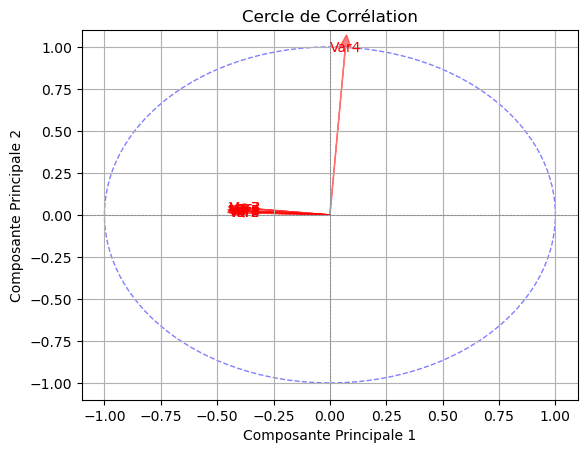

In [28]:
components = pca.components_
for i, (x, y) in enumerate(components.T):
    plt.arrow(0, 0, x, y, color='r', alpha=0.5, head_width=0.05)
    plt.text(x, y, f"Var{i+1}", color='r', ha='center', va='center')

# Tracer un cercle
circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='--', alpha=0.5)
plt.gca().add_artist(circle)

# Ajuster les limites et ajouter des labels
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Cercle de Corrélation')
plt.grid()
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.show()

**Graphique qui montre la corrélation entre les variables d'origine et les nouvelles composantes. Il permet d'identifier les relations entre les variables dans le nouvel espace de composantes.**

- La majorité des variables sont regroupées horizontalement vers la gauche (autour de -0.25 sur CP1)
- Une variable (Var4) se distingue nettement, pointant verticalement vers le haut (sur CP2)

- Les variables regroupées horizontalement sont fortement corrélées entre elles (car leurs flèches sont proches et pointent dans la même direction)
- La variable Var4 est presque orthogonale aux autres, ce qui indique qu'elle est indépendante du premier groupe
- La faible longueur des flèches horizontales suggère une qualité de représentation moyenne dans ce plan
- La Composante Principale 1 (axe horizontal) est principalement liée au groupe de variables alignées horizontalement
- La Composante Principale 2 (axe vertical) est fortement influencée par la variable Var4
- La variable Var4 est bien représentée dans ce plan (flèche plus longue)